## Logistic Regression — Breast Cancer Prediction

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [2]:
# Reading the Dataset
df = pd.read_csv("data.csv") #read the .csv dataset
df.head(5) #print the first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Exploratory Data Analysis
df.columns # displays the columns/variables/featurtes in the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.info() # information about columns like their data types, Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Deleting the column using its index
df.drop(df.columns[32], axis=1, inplace=True)

# Display the first 3 rows to verify the column has been deleted
print(df.head(3))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622 

In [6]:
# Target variable “diagnosis” is a categorical variable M: Malignant, B: Benign. It is changed to M:1, B:0
df["diagnosis"] = df["diagnosis"].apply(lambda x : "1" if x == "M" else "0")
df = df.set_index("id")
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
print(len(df.columns)) # prints the length of columns

31


Number of Benign patients: 357
Number of Malignant patients: 212


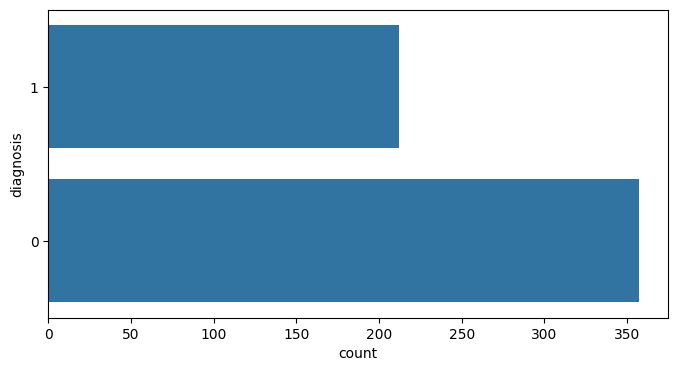

In [8]:
# Number of Benign and Malignant observations
benign, malignant = df["diagnosis"].value_counts() # Counting
print("Number of Benign patients:", benign) # Prints number of Benign
print("Number of Malignant patients:", malignant)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'])
plt.show()

In [9]:
# Target Variables and Feature Variables into y and X
y = df["diagnosis"].values # y contains Target variable
X = df.drop("diagnosis", axis =1).values # X contains Feature variables

In [10]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [11]:
# Data Normalization/Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
print(X_train_sc)

[[-1.34450029  0.5346355  -1.32325205 ... -1.34334388 -0.84057964
   0.48739774]
 [ 3.77500369  1.58209417  3.89649166 ...  2.25906721 -0.39639035
  -0.51916346]
 [-0.12789731 -0.68625859 -0.17338951 ... -0.40950938 -0.11981967
  -0.31830386]
 ...
 [-0.8067862  -1.4370514  -0.81092486 ... -0.40251322 -0.24218124
  -0.18251146]
 [-0.92324831 -0.84828378 -0.88563924 ... -0.52175203 -0.49696151
   1.38928563]
 [-0.44603771 -0.06097825 -0.41313236 ... -0.32418671 -1.26800706
  -0.65439007]]


In [12]:
# Building Logistic Regression
model = LogisticRegression(C = 0.3)
model.fit(X_train_sc, y_train)

LogisticRegression(C=0.3)

In [13]:
# Predicting
y_pred_lr = model.predict(X_test_sc) # predicting on test data
accuracy_lr = accuracy_score(y_test,y_pred_lr) # accuarcy between actual test values and predicted values
print("Accuracy on Test Data:",accuracy_lr) # prints the accuracy score

Accuracy on Test Data: 0.9824561403508771


In [14]:
# Confusion matrix
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,2,46


In [15]:
# Classification report
print(classification_report(y_test, y_pred_lr)) # print the classification report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:
from sklearn.linear_model import LogisticRegression
import pickle

# Step 2: Save the model to a file using pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Step 3: Later, load the model from the file
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now, you can use loaded_model to make predictions


NameError: name 'logistic_model' is not defined